# FIFA

In [3]:
import pandas as pd
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

test = pd.read_csv('/content/drive/MyDrive/ML/FIFA_test.csv')
train = pd.read_csv('/content/drive/MyDrive/ML/FIFA_train.csv')
sub = pd.read_csv('/content/drive/MyDrive/ML/submission.csv')

# 데이터 프레임 생성
df_test = pd.DataFrame(test)
df_train = pd.DataFrame(train)
df_sub = pd.DataFrame(sub)

print(df_test.shape, df_train.shape, df_sub.shape)

(3828, 11) (8932, 12) (3828, 2)


In [4]:
df_train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [6]:
df_train.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [7]:
df_train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [8]:
nums = ['age',	'stat_overall',	'stat_potential',	'value']
noms = ['continent','position',	'prefer_foot','reputation', 'stat_skill_moves']

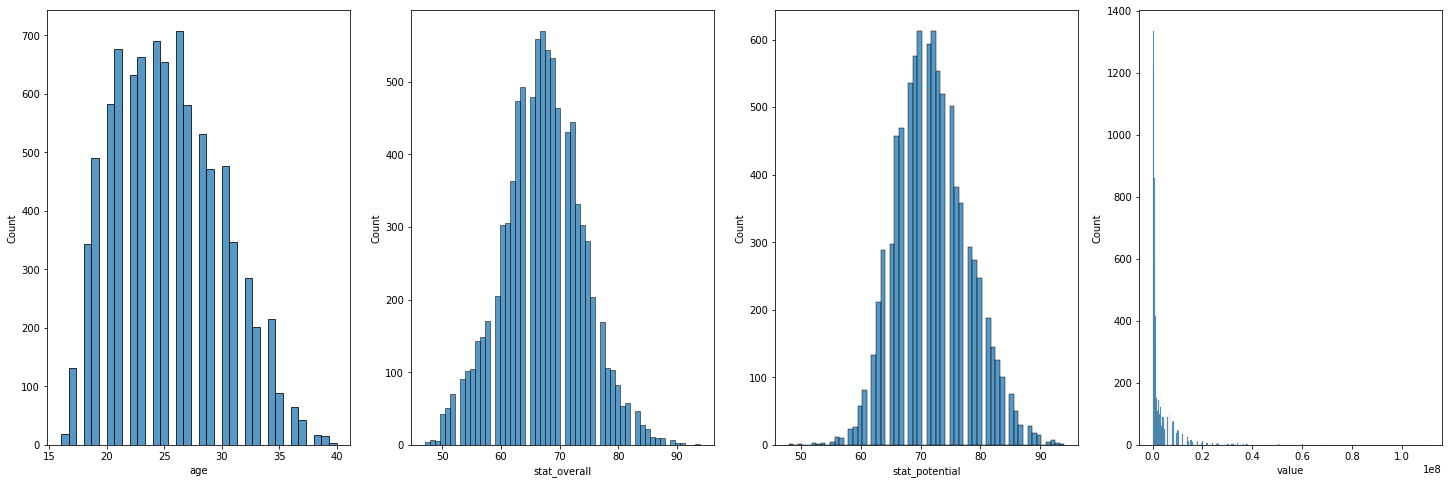

In [9]:
fig, axes = plt.subplots(1,len(nums),figsize = (25,8))
for i,j in zip(nums,axes): # zip()는 동일 개수로 이루어진 자료형을 묶어주는 함수
  sns.histplot(data=df_train,x=i,ax=j)
plt.show()

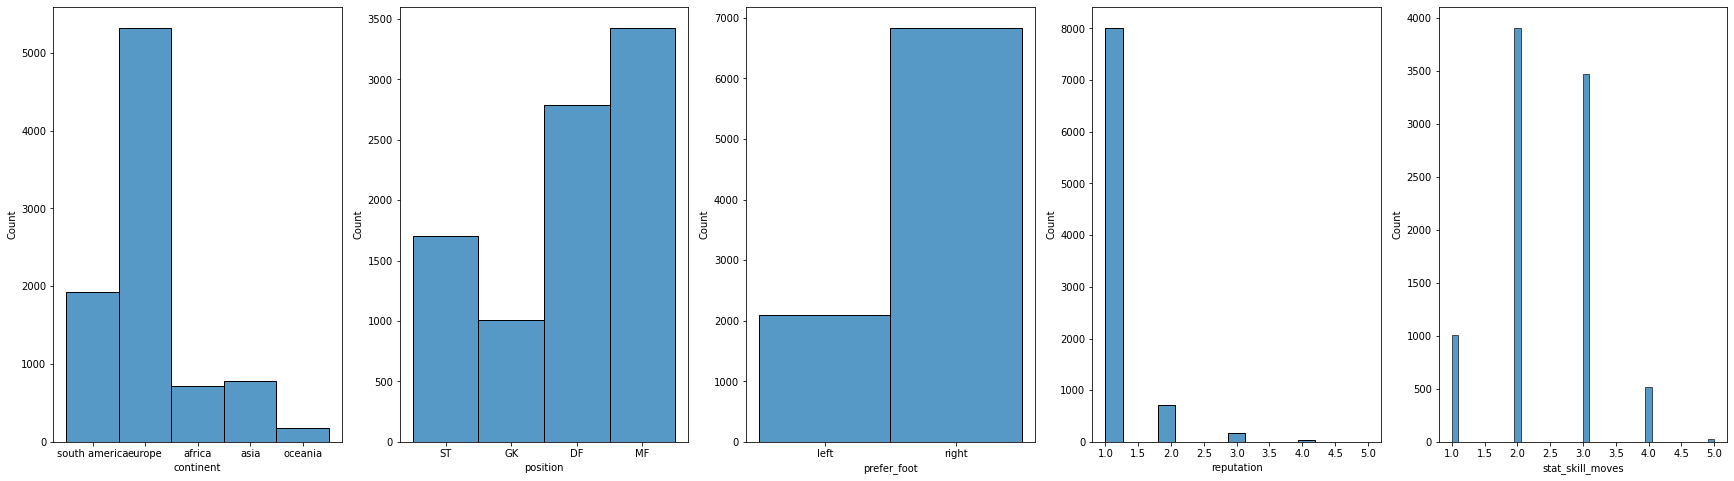

In [10]:
fig, axes = plt.subplots(1,len(noms),figsize = (30,8))
for i,j in zip(noms,axes):
  sns.histplot(data=df_train[noms],x=i,ax=j)
plt.show()

In [11]:
df_train['contract_until'].value_counts(ascending = True)

Jan 12, 2019       1
May 31, 2020       1
2026               1
Jan 1, 2019        2
2025               3
Jun 30, 2020       9
Jan 31, 2019      10
2024              12
May 31, 2019      19
Dec 31, 2018      64
2018             327
Jun 30, 2019     501
2023             506
2022             761
2020            2041
2021            2308
2019            2366
Name: contract_until, dtype: int64

In [12]:
df_train['contract_until'] = df_train['contract_until'].apply(lambda x : int(x[-4:]))
df_train['contract_until'].value_counts(ascending = True)

2026       1
2025       3
2024      12
2018     391
2023     506
2022     761
2020    2051
2021    2308
2019    2899
Name: contract_until, dtype: int64

In [13]:
df_test['contract_until'] = df_test['contract_until'].apply(lambda x : int(x[-4:]))
df_test['contract_until'].value_counts(ascending = True)

2026       1
2024       2
2025       4
2018     189
2023     251
2022     338
2020     887
2021     985
2019    1171
Name: contract_until, dtype: int64

In [14]:
df_train.corr()

,id,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,1.000000,-0.475785,-0.143197,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280
age,-0.475785,1.000000,-0.132052,0.263468,0.467345,-0.231303,0.039362,0.087319
contract_until,-0.143197,-0.132052,1.000000,0.070446,0.156983,0.258477,0.082641,0.228638
reputation,-0.423739,0.263468,0.070446,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,-0.972374,0.467345,0.156983,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.630199,-0.231303,0.258477,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,-0.402455,0.039362,0.082641,0.196582,0.400164,0.332578,1.000000,0.298500
value,-0.544280,0.087319,0.228638,0.665982,0.658444,0.611907,0.298500,1.000000


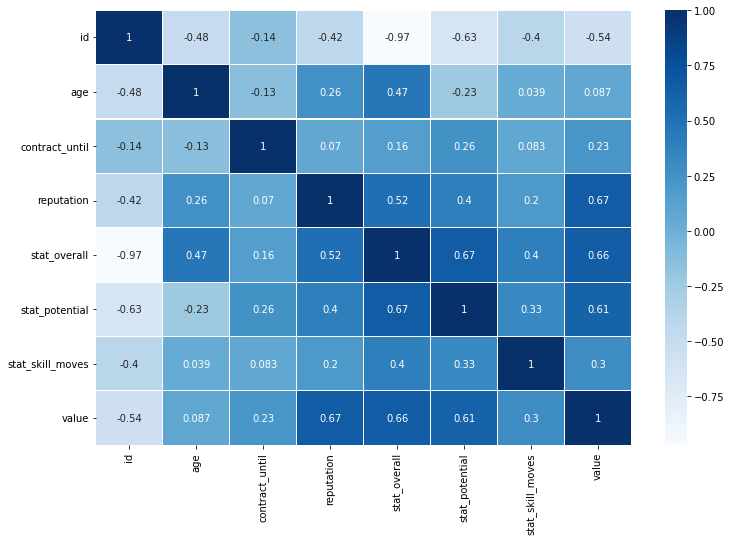

In [15]:
plt.figure(figsize = (12, 8))
x = sns.heatmap(df_train.corr(), cmap = 'Blues', linewidths = '0.1',annot = True)

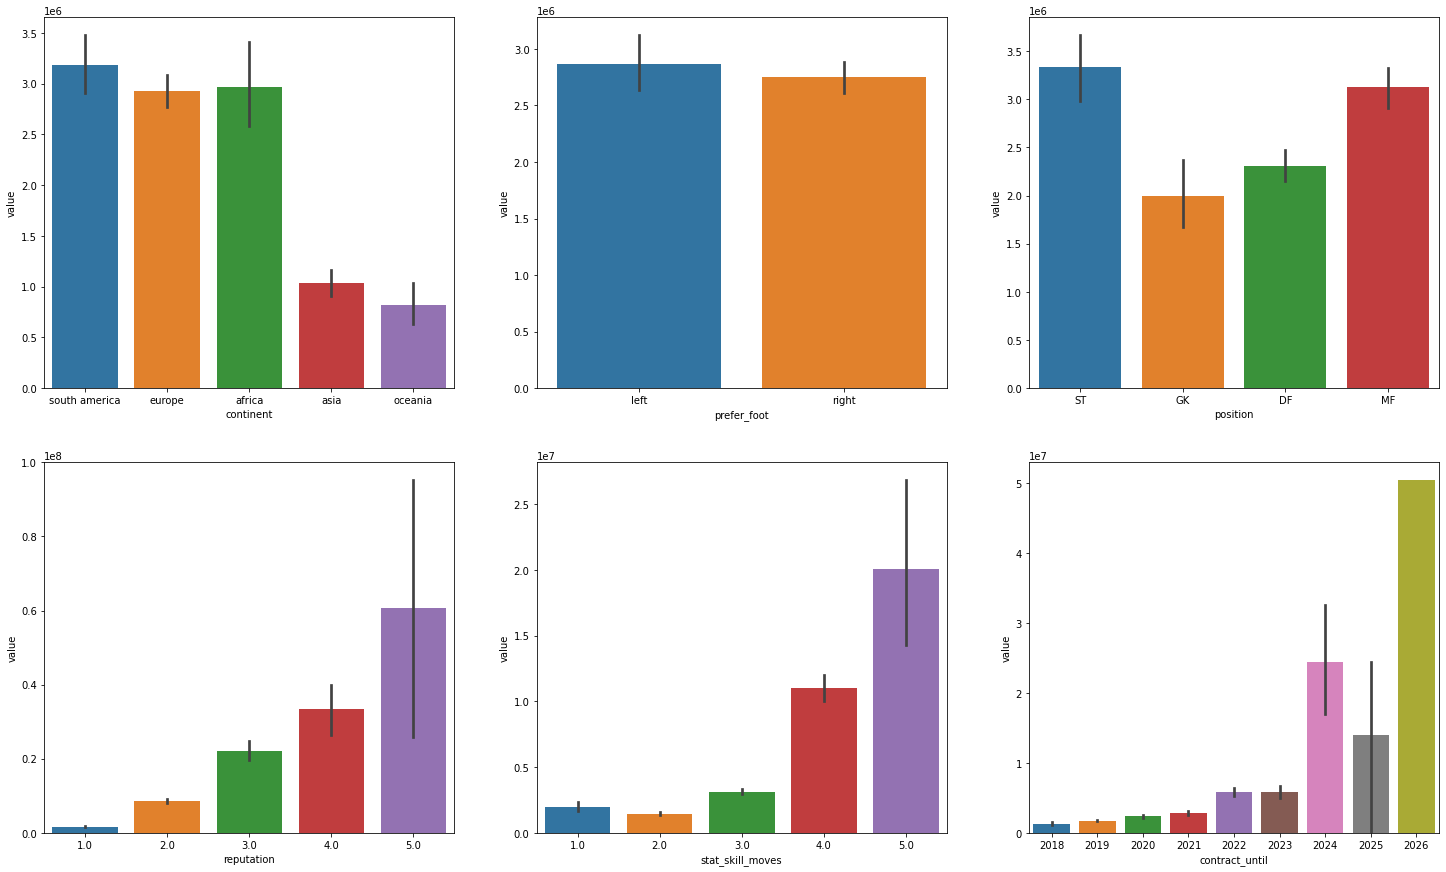

In [16]:
fig , axes = plt.subplots(2,3)
axes = axes.flatten()
fig.set_size_inches(25,15)

# feature에 따른 value 값 평균 그래프
sns.barplot(x="continent", y="value", data=df_train, ax=axes[0])
sns.barplot(x="prefer_foot", y="value", data=df_train, ax=axes[1])
sns.barplot(x="position", y="value", data=df_train, ax=axes[2])
sns.barplot(x="reputation", y="value", data=df_train, ax=axes[3])
sns.barplot(x="stat_skill_moves", y="value", data=df_train, ax=axes[4])
sns.barplot(x="contract_until", y="value", data=df_train, ax=axes[5])

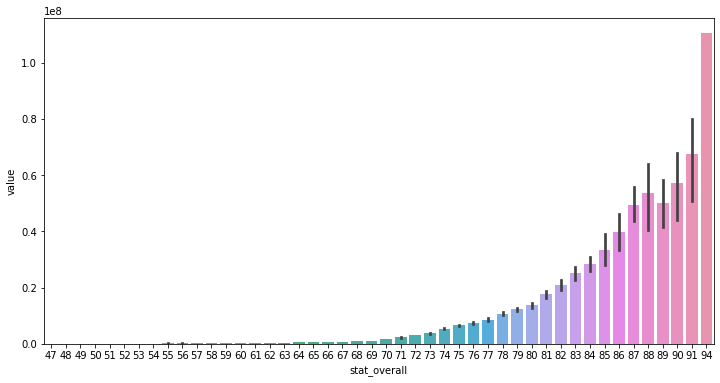

In [17]:
ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="stat_overall", y="value", data=df_train)
plt.show()

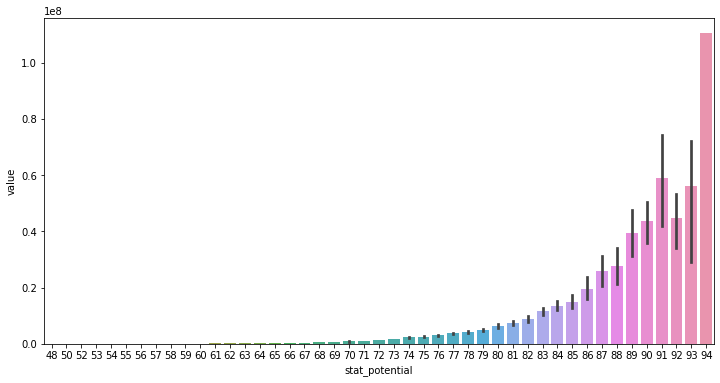

In [18]:
ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="stat_potential", y="value", data=df_train)
plt.show()

In [19]:
# 필요없는 feature drop 
df_train.drop(['id','name','age','continent','position','prefer_foot'],axis=1,inplace =True)
df_test.drop(['id','name','age','continent','position','prefer_foot'],axis=1,inplace =True)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_train.drop(['value'],axis=1))
scaler.fit(df_test)

scalerd_train = scaler.fit_transform(df_train.drop(['value'],axis=1))
scalerd_test = scaler.transform(df_test)

col = ['contract_until','reputation','stat_overall','stat_potential','stat_skill_moves']

train = pd.DataFrame(scalerd_train,columns = col)
test = pd.DataFrame(scalerd_test,columns = col)

In [21]:
train

,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves
0,0.375,1.00,1.000000,1.000000,0.75
1,0.250,0.75,0.936170,0.978261,0.00
2,0.375,1.00,0.936170,0.934783,0.50
3,0.250,0.75,0.936170,0.934783,0.50
4,0.375,0.50,0.914894,0.978261,0.00
...,...,...,...,...,...
8927,0.125,0.00,0.021277,0.326087,0.50
8928,0.250,0.00,0.000000,0.239130,0.25
8929,0.375,0.00,0.000000,0.347826,0.25
8930,0.375,0.00,0.000000,0.369565,0.00


In [22]:
test

,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves
0,0.500,1.00,1.000000,1.000000,1.00
1,0.500,1.00,0.957447,0.978261,1.00
2,0.625,0.75,0.936170,0.956522,0.75
3,0.250,0.75,0.936170,0.934783,0.75
4,0.250,0.75,0.936170,0.934783,0.75
...,...,...,...,...,...
3823,0.375,0.00,0.021277,0.326087,0.25
3824,0.000,0.00,0.021277,0.369565,0.00
3825,0.375,0.00,0.021277,0.369565,0.25
3826,0.250,0.00,0.000000,0.282609,0.25


In [23]:
train['value'] = df_train['value']

In [24]:
from sklearn.model_selection import train_test_split
y_target = train['value']
X_train,X_test,y_train,y_test = train_test_split(train.drop(['value'],axis=1),y_target,test_size = 0.2)

In [25]:
print(X_train.shape,y_train.shape,test.shape)

(7145, 5) (7145,) (3828, 5)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from xgboost import plot_importance

params ={
    'n_estimators':[50, 100, 200, 300],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 16],
    'min_samples_split':[4, 8, 16, 20]
}

xgb = XGBRegressor(objective='reg:squarederror')
grid_cv = GridSearchCV(xgb, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 50}
최고 예측 정확도: 0.9394


In [ ]:
model = XGBRegressor(objective='reg:squarederror',n_estimators = 50, max_depth = 6, min_samples_leaf = 8, min_samples_split = 4)

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(max_depth=6, min_samples_leaf=8, min_samples_split=4,
             n_estimators=50, objective='reg:squarederror')

In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

print("훈련 세트 RMSE: {:.3f}".format(np.sqrt(mean_squared_error(y_train,pred_train))))
print("테스트 세트 RMSE: {:.3f}".format(np.sqrt(mean_squared_error(y_test,pred_test))))

훈련 세트 RMSE: 702777.486
테스트 세트 RMSE: 1157296.263


In [ ]:
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)) )

훈련 세트 정확도: 0.986
테스트 세트 정확도: 0.954


In [ ]:
pred_result = model.predict(test)

In [ ]:
pred_result

array([1.0116399e+08, 7.9500280e+07, 7.0771544e+07, ..., 1.2123149e+05,
       1.0116987e+05, 1.0116987e+05], dtype=float32)

In [ ]:
test['value'] = pred_result

In [ ]:
test

,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0.500,1.00,1.000000,1.000000,1.00,1.011640e+08
1,0.500,1.00,0.957447,0.978261,1.00,7.950028e+07
2,0.625,0.75,0.936170,0.956522,0.75,7.077154e+07
3,0.250,0.75,0.936170,0.934783,0.75,5.434827e+07
4,0.250,0.75,0.936170,0.934783,0.75,5.434827e+07
...,...,...,...,...,...,...
3823,0.375,0.00,0.021277,0.326087,0.25,1.011699e+05
3824,0.000,0.00,0.021277,0.369565,0.00,6.036125e+04
3825,0.375,0.00,0.021277,0.369565,0.25,1.212315e+05
3826,0.250,0.00,0.000000,0.282609,0.25,1.011699e+05
